# Python Demonstration for UTS::DataLounge Master Class

Written by A/Prof Richard Xu

yida.xu@uts.edu.au

11-03-2018

## linear regression

interactive program to illustrate how linear regression works and the error surface of a function

<IPython.core.display.Javascript object>


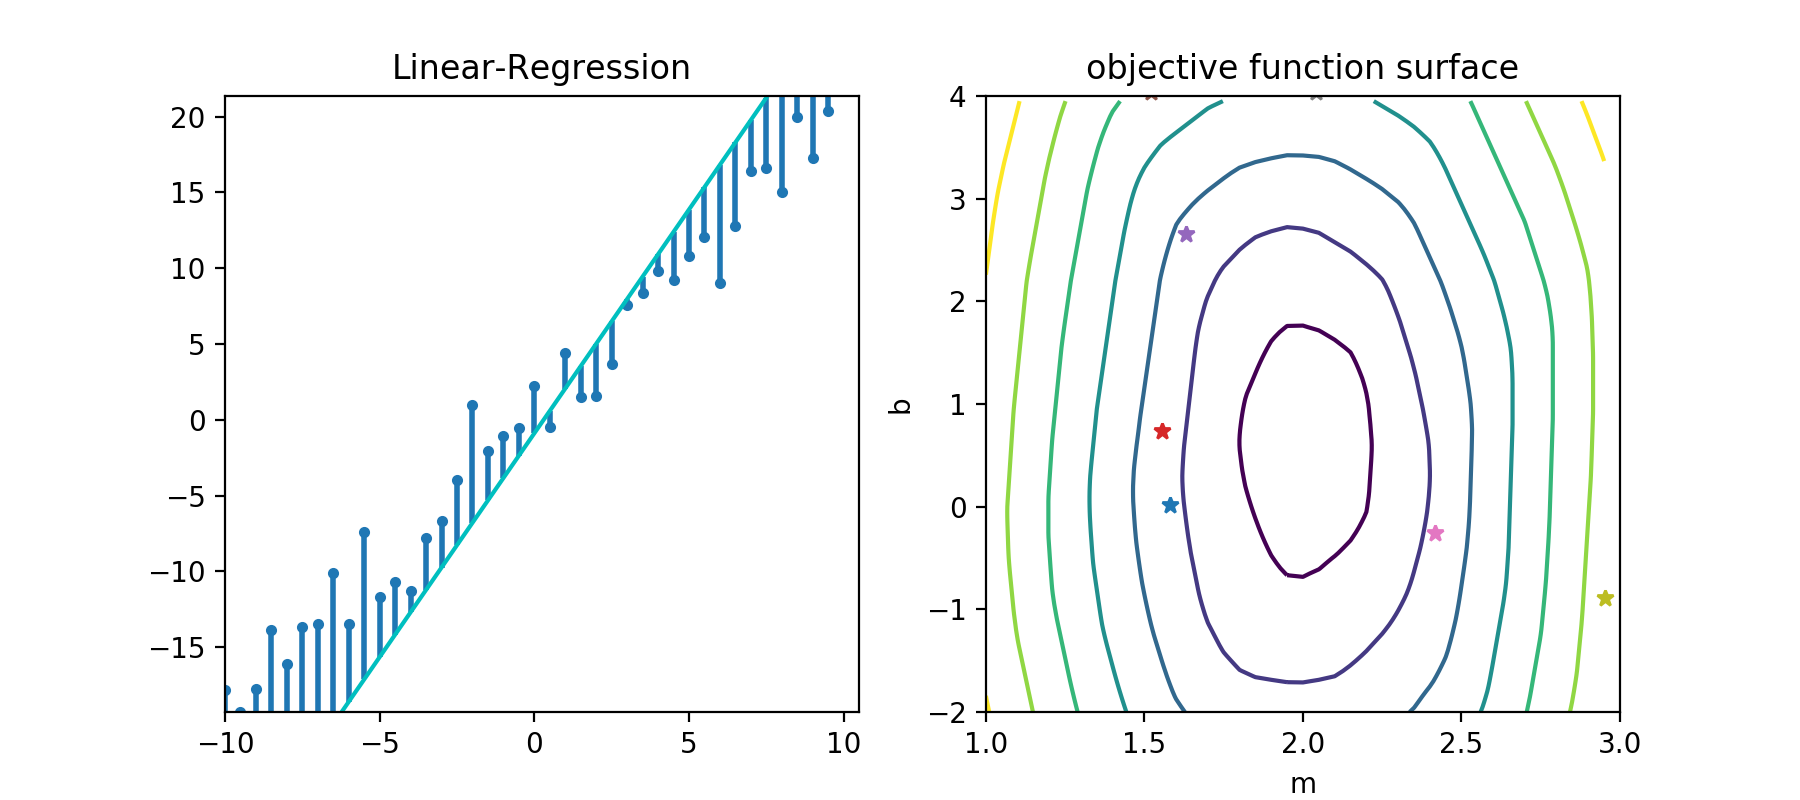

In [81]:
import numpy as np
%matplotlib notebook
import matplotlib.pyplot as plt
from matplotlib.widgets import Button
import math
from matplotlib import collections as mc       

m = 2.0;
b = 1.0;

X = np.arange(-10,10,0.5)
N = X.shape[0]
Y = m* X + b + np.random.normal(loc=0.0, scale=1.0*2, size=N)

fig = plt.figure(figsize=(9, 4))
size_t = [1,3];

plot_data = {'X': X, 'Y': Y, 'm': m, 'b': b, 'size_t':size_t}

@np.vectorize
def objective(m1, b1):
    return sum( (( X * m1 + b1 - Y )**2)**0.5 )/N

class linear_regression_plot:
    
    
    def __init__(self,indices, plot_data):
                
        self.indices = indices
        self.cid = fig.canvas.mpl_connect('button_press_event', self)   
        self.plot_data = plot_data
        
        ax1=fig.add_subplot(1,2,1)
        ax1.set_title('Linear-Regression')
        ax2=fig.add_subplot(1,2,2)
        ax2.set_title('objective-function')
        ax2.set_xlabel('m')
        ax2.set_ylabel('b')
        
        self.ax2 = ax2
        X = self.plot_data['X']
        Y = self.plot_data['Y']
        m = self.plot_data['m']
        b = self.plot_data['b']
        size_t = self.plot_data['size_t']
        
        
        N = X.shape[0]
         
                    
        delta = 0.05
        
        m_mesh, b_mesh = np.meshgrid(np.arange(m-size_t[0], m+size_t[0], delta),  np.arange(b-size_t[1], b+size_t[1], delta))
        
        Z = objective(m_mesh, b_mesh)
        ax2.contour(m_mesh, b_mesh, Z)
        ax2.set_title('objective function surface')
        ax2.set_xlim(m-size_t[0], m+size_t[0])
        ax2.set_ylim(b-size_t[1], b+size_t[1])
            
        
    def __call__(self, event):
        
        
        ax = event.inaxes
        print('click', ax)
        print('hello')
        
        if ax.get_title() == 'Linear-Regression':
         
        
            print('hello')
            ax.cla()           
            ax.set_title('Linear-Regression')
            
            
            X = self.plot_data['X']
            Y = self.plot_data['Y']
            m = self.plot_data['m']
            b = self.plot_data['b']
            size_t = self.plot_data['size_t']
            
            m1 = np.random.uniform(m-size_t[0],m+size_t[0])
            b1 = np.random.uniform(m-size_t[1],m+size_t[1])
            
            ax.set_xlim(min(X), max(X)+1)
            ax.set_ylim(min(Y), max(Y)+1)
            
            lines_array = np.zeros([N,2,2])
            lines_array[:,0,0] = X
            lines_array[:,1,0] = X
            lines_array[:,0,1] = Y
            lines_array[:,1,1] = m1*X+b1
         
            lc = mc.LineCollection(lines_array, linewidths=2)
            ax.add_collection(lc)
            ax.plot(X,Y,'.')
            #ax.plot( [min(X),max(X)] , [min(X)*m+b,max(X)*m+b], color='r')
            ax.plot( [min(X),max(X)] , [min(X)*m1+b1,max(X)*m1+b1], color='c')
            self.ax2.plot(m1,b1,'*')

                   
            self.indices[0] = self.indices[0] + 1
        
                
        if ax.get_title() == 'objective-function':
           
            self.indices[1] = self.indices[1] + 1
            


indices = [1,1]
linebuilder = linear_regression_plot(indices,plot_data)
plt.show()


## K-means##
interactive program to illustrate how K-means algorithm works

<IPython.core.display.Javascript object>


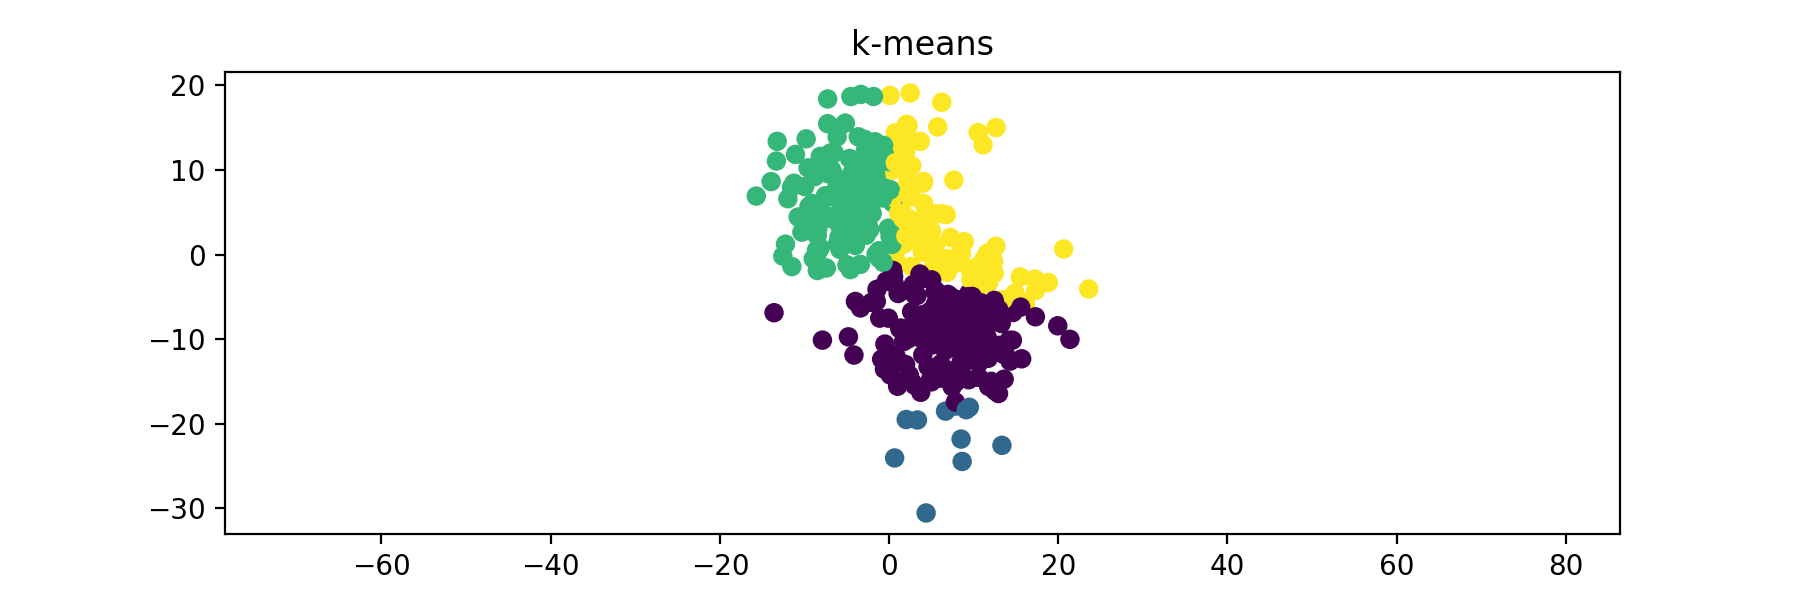

In [84]:
%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.widgets import Button
from sklearn.datasets.samples_generator import make_blobs
from sklearn.cluster import KMeans

n_clusters = 4
X, y  = make_blobs(n_samples=400, n_features = 2, centers=n_clusters, cluster_std = 5)

fig = plt.figure(figsize=(9, 3))

init = np.array([[-0.1, -0.1], [0, 0], [0.1, 0.1],[0.2, 0.2]],  np.float64)
plot_data = {'X': X, 'init': init, 'n_clusters':n_clusters}


class kmeans_plot:
     
    def __init__(self, plot_data):
        
        self.cid = fig.canvas.mpl_connect('button_press_event', self)   
        
        ax=fig.add_subplot(1,1,1)
        ax.set_title('k-means')
        ax.axis('equal')
        self.plot_data = plot_data
        
        X = self.plot_data['X']
        init = self.plot_data['init']
        n_clusters = self.plot_data['n_clusters']
        
        kmeans = KMeans(n_clusters = n_clusters, random_state=0, init=init, max_iter=1)
        labels = kmeans.fit(X).predict(X)
        ax.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', zorder=2)
        
        self.plot_data['init']=kmeans.cluster_centers_
        
        self.ax = ax
        
    
    def __call__(self, event):
                
        ax = event.inaxes 
        
        if ax.get_title() == 'k-means':
            
            
            X = self.plot_data['X']
            init = self.plot_data['init']
            n_clusters = self.plot_data['n_clusters']

            kmeans = KMeans(n_clusters = n_clusters, random_state=0, init=init, max_iter=1)
            labels = kmeans.fit(X).predict(X)

            self.ax.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', zorder=2)

            self.plot_data['init']=kmeans.cluster_centers_
      
                

kmeans_plot(plot_data)
plt.show()
